**GOAL:** 
Combine the results from test3 and test2

In [75]:
from fama_data.FamaData import FamaData

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [76]:
ff_df = pd.read_csv('exported/alt_ff_factors.csv')
if_df = pd.read_csv('exported/lasso_industry_factors.csv')

In [77]:
df = pd.concat([ff_df.drop('caldt', axis = 1), if_df.drop('caldt', axis = 1)], axis=1)
df.describe()

,exmt,share_issue_delta,shortterm_rev_delta,longterm_rev_delta,innov_delta,growth_delta,durable_delta,service_minus_goods,needs_minus_wants,accrual_delta,...,SodaMinusTxtls,HshldMinusClths,HshldMinusTxtls,HshldMinusAero,HshldMinusChips,HshldMinusBoxes,HshldMinusBanks,MedEqMinusChips,DrugsMinusHardw,DrugsMinusBanks
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,...,7.110000e+02,711.000000,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02
mean,0.005433,-0.428439,-0.330380,-0.321969,0.011772,0.160225,0.044543,-4.241210,-6.706090,-0.327257,...,-2.498392e-17,0.000000,4.996784e-18,-6.245980e-18,1.499035e-17,-8.744373e-18,-6.245980e-18,9.993569e-18,-4.996784e-18,1.249196e-18
std,0.044894,3.225668,5.529345,5.322832,5.171849,3.418934,4.277288,27.565854,31.480629,2.810405,...,1.000704e+00,1.000704,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00
min,-0.232400,-12.380000,-37.920000,-33.380000,-26.100000,-14.485000,-13.520000,-135.230000,-174.720000,-13.730000,...,-4.439050e+00,-7.669491,-8.151329e+00,-4.845767e+00,-6.412996e+00,-6.185943e+00,-6.190361e+00,-3.877625e+00,-4.229608e+00,-4.735851e+00
25%,-0.019700,-2.395000,-2.695000,-3.075000,-2.785000,-1.800000,-2.255000,-14.585000,-12.400000,-1.865000,...,-6.040516e-01,-0.554086,-4.980836e-01,-5.721134e-01,-5.439408e-01,-5.916958e-01,-5.760044e-01,-5.675330e-01,-5.951459e-01,-5.866070e-01
50%,0.009100,-0.280000,-0.250000,-0.040000,-0.020000,0.135000,-0.220000,-0.680000,-0.570000,-0.280000,...,5.897122e-03,0.041536,-9.078950e-04,1.646257e-02,-9.634904e-03,-6.008159e-03,5.739336e-03,1.063779e-02,3.456753e-02,4.770939e-02
75%,0.034000,1.540000,2.485000,2.680000,2.870000,2.137500,1.975000,10.810000,9.715000,1.245000,...,5.861452e-01,0.553597,4.669263e-01,6.059640e-01,5.853310e-01,5.715450e-01,5.853677e-01,6.274678e-01,5.651519e-01,5.976442e-01
max,0.161000,10.550000,25.390000,21.090000,24.370000,15.285000,33.860000,88.900000,75.750000,10.900000,...,5.086871e+00,2.917625,4.719816e+00,5.380278e+00,5.220414e+00,4.235579e+00,3.483509e+00,5.539772e+00,5.273783e+00,4.683844e+00


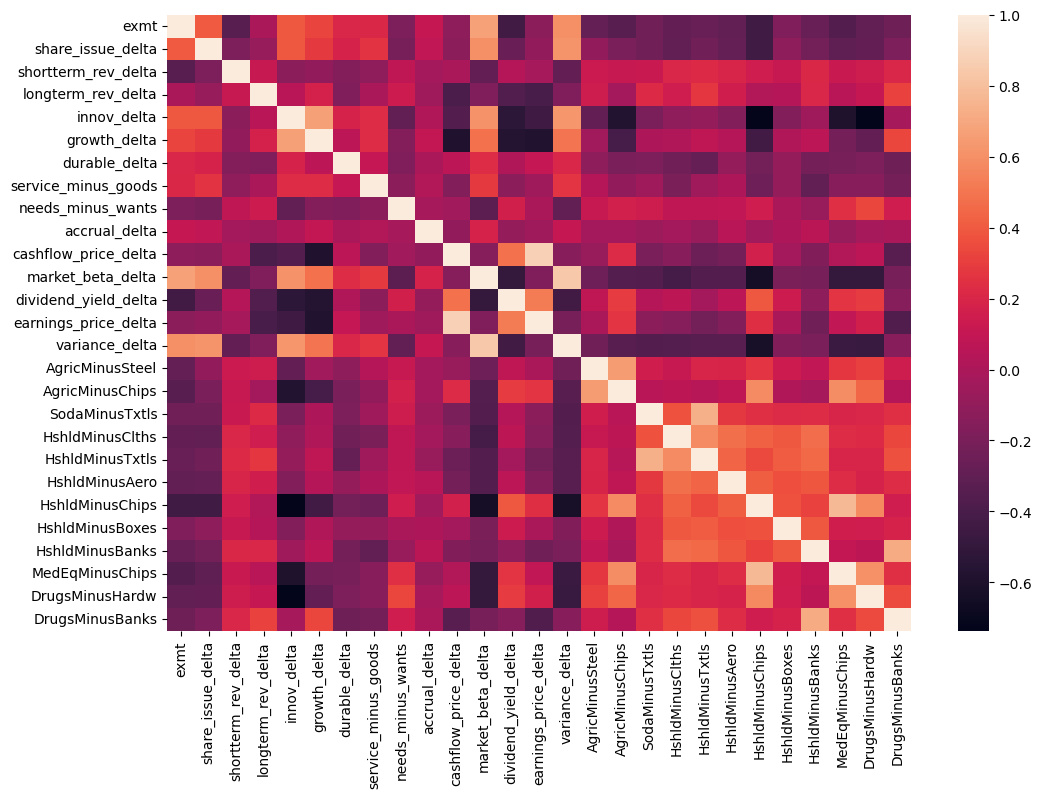

In [78]:
plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(df.corr(), annot = False)
plt.show()

In [79]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
vif_data

,feature,VIF
0,exmt,2.249227
1,share_issue_delta,1.812056
2,shortterm_rev_delta,1.238286
3,longterm_rev_delta,1.706874
4,innov_delta,7.303307
5,growth_delta,4.956361
6,durable_delta,1.258350
7,service_minus_goods,1.367331
8,needs_minus_wants,1.358898
9,accrual_delta,1.127160


In [80]:
# HshldMinusChips has a high VIF, so we drop it
df = df.drop('HshldMinusChips', axis = 1)
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
vif_data

,feature,VIF
0,exmt,2.245822
1,share_issue_delta,1.804555
2,shortterm_rev_delta,1.222605
3,longterm_rev_delta,1.701902
4,innov_delta,6.976129
5,growth_delta,4.749350
6,durable_delta,1.258340
7,service_minus_goods,1.366703
8,needs_minus_wants,1.349742
9,accrual_delta,1.127147


In [81]:
# Seems like we're good to go

In [82]:
# Our first testing portfolios
# Equal-weighted momentum portfolios
url = 'http://diether.org/prephd/10-port_mom_ew.csv'
port = pd.read_csv(url,parse_dates=['caldt'])
port = port.query('caldt >= "1963-07-31" and caldt <= "2023-02-28"')
port = port.drop('caldt', axis = 1)
port.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 438 to 1148
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p0      711 non-null    float64
 1   p1      711 non-null    float64
 2   p2      711 non-null    float64
 3   p3      711 non-null    float64
 4   p4      711 non-null    float64
dtypes: float64(5)
memory usage: 33.3 KB


In [83]:
regressors = df.columns
df = pd.concat([port.reset_index(drop = True), df.reset_index(drop = True)], axis=1)

In [84]:
ols('p4 - p0 ~ 1 + ' + ' + '.join(regressors), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     p4   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     126.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.13e-241
Time:                        18:31:28   Log-Likelihood:                -1680.2
No. Observations:                 711   AIC:                             3414.
Df Residuals:                     684   BIC:                             3538.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1978      0.108     11.044      0.000       0.985       1.411
exmt                    93.8040      3.306     28.378      0.000      87.314     100.294
share_issue_delta        0.1328      0.041      3.252      0.001       0.053       0.213
shortterm_rev_delta      0.0454      0.020      2.311      0.021       0.007       0.084
longterm_rev_delta      -0.1428      0.024     -5.929      0.000      -0.190      -0.096
innov_delta              0.0141      0.050      0.280      0.780      -0.085       0.113
growth_delta            -0.0827      0.063     -1.318      0.188      -0.206       0.041
durable_delta           -0.1185      0.026     -4.588      0.000      -0.169      -0.068
service_minus_goods      0.0116      0.004      2.764      0.006       0.003       0.020
needs_minus_wants       -0.0052      0.004     -1.435      0.152      -0.012       0.002
accrual_delta           -0.0633      0.037     -1.702      0.089      -0.136       0.010
cashflow_price_delta    -0.0205      0.053     -0.389      0.697      -0.124       0.083
market_beta_delta        0.0260      0.035      0.741      0.459      -0.043       0.095
dividend_yield_delta    -0.1234      0.030     -4.169      0.000      -0.182      -0.065
earnings_price_delta     0.1444      0.054      2.686      0.007       0.039       0.250
variance_delta           0.2075      0.026      7.934      0.000       0.156       0.259
AgricMinusSteel          0.3820      0.159      2.403      0.017       0.070       0.694
AgricMinusChips          0.0692      0.199      0.348      0.728      -0.321       0.459
SodaMinusTxtls           0.1396      0.158      0.886      0.376      -0.170       0.449
HshldMinusClths          0.0326      0.143      0.227      0.820      -0.249       0.314
HshldMinusTxtls         -0.6453      0.187     -3.443      0.001      -1.013      -0.277
HshldMinusAero           0.0559      0.130      0.429      0.668      -0.200       0.312
HshldMinusBoxes          0.0990      0.124      0.799      0.425      -0.144       0.342
HshldMinusBanks          0.2646      0.240      1.104      0.270      -0.206       0.735
MedEqMinusChips          0.2917      0.162      1.801      0.072      -0.026       0.610
DrugsMinusHardw         -0.0407      0.214     -0.191      0.849      -0.460       0.379
DrugsMinusBanks          0.4938      0.253      1.949      0.052      -0.004       0.991
==============================================================================
Omnibus:                       75.913   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.812
Skew:                           0.123   Prob(JB):                    9.84e-113
Kurtosis:                       7.165   Cond. No.                     1.11e+03
==================

In [85]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
vif_data

,feature,VIF
0,p0,23.052557
1,p1,58.014588
2,p2,76.509095
3,p3,57.744148
4,p4,21.689709
5,exmt,10.298445
6,share_issue_delta,1.849885
7,shortterm_rev_delta,1.286544
8,longterm_rev_delta,1.814289
9,innov_delta,7.284260


Are we getting nowhere?

Let's break: add the Fama French Factors

In [86]:
fd = FamaData('data/', end_date = '2022-09-30')
SMB_proxy = fd.get_size_data()['Hi 10'] - fd.get_size_data()['Lo 10']
HML_proxy = fd.get_book_to_market_data()['Hi 10'] - fd.get_book_to_market_data()['Lo 10']

# Fama-French 5-factor model components
RMW_proxy = fd.get_operating_profitability_data()['Hi 10'] - fd.get_operating_profitability_data()['Lo 10']
CMA_proxy = fd.get_investment_data()['Hi 10'] - fd.get_investment_data()['Lo 10']

# And momentum
MOM_proxy = fd.get_momentum_data()['Hi PRIOR'] - fd.get_momentum_data()['Lo PRIOR']

SMB_proxy.name = 'SMB'
HML_proxy.name = 'HML'
RMW_proxy.name = 'RMW'
CMA_proxy.name = 'CMA'
MOM_proxy.name = 'MOM'

In [87]:
fama_factors = pd.concat([SMB_proxy.reset_index(drop=True), HML_proxy.reset_index(drop=True), RMW_proxy.reset_index(drop=True), 
                        CMA_proxy.reset_index(drop=True), MOM_proxy.reset_index(drop=True)], axis = 1)

df = pd.concat([df.reset_index(drop=True), fama_factors.reset_index(drop=True)], axis = 1)
df.head(3)

,p0,p1,p2,p3,p4,exmt,share_issue_delta,shortterm_rev_delta,longterm_rev_delta,innov_delta,...,HshldMinusBoxes,HshldMinusBanks,MedEqMinusChips,DrugsMinusHardw,DrugsMinusBanks,SMB,HML,RMW,CMA,MOM
0,-1.643322,-1.284810,-0.512732,-0.979859,-0.385561,-0.0039,2.09,-0.16,-1.34,-0.20,...,-0.115244,0.310362,-0.056372,0.146697,0.420152,0.55,-2.66,2.42,3.07,2.98
1,2.761947,3.405911,4.273330,4.401903,6.501132,0.0507,1.55,-0.64,0.52,0.25,...,0.163655,0.445749,0.254621,0.827600,1.035070,2.67,1.67,0.54,2.32,3.23
2,-2.617577,-0.725381,-1.154537,-1.158321,-1.688062,-0.0157,-1.86,-0.89,2.00,1.82,...,0.161331,0.375940,0.036411,-0.987600,-0.225803,-0.73,-1.77,2.05,-1.02,1.16


In [88]:
regressors = regressors.append(pd.Index(['SMB', 'HML', 'RMW', 'CMA', 'MOM']))

In [103]:
ols('p4 - p0 ~ 1 + ' + ' + '.join(regressors), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     p4   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     489.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:39:42   Log-Likelihood:                -1185.9
No. Observations:                 711   AIC:                             2436.
Df Residuals:                     679   BIC:                             2582.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6299      0.056     11.250      0.000       0.520       0.740
exmt                   106.3191      1.720     61.800      0.000     102.941     109.697
share_issue_delta       -0.0284      0.022     -1.277      0.202      -0.072       0.015
shortterm_rev_delta     -0.0517      0.010     -4.988      0.000      -0.072      -0.031
longterm_rev_delta      -0.0227      0.014     -1.642      0.101      -0.050       0.004
innov_delta              0.0074      0.026      0.285      0.776      -0.044       0.058
growth_delta          8.393e-05      0.032      0.003      0.998      -0.062       0.062
durable_delta           -0.0204      0.013     -1.552      0.121      -0.046       0.005
service_minus_goods      0.0021      0.002      0.981      0.327      -0.002       0.006
needs_minus_wants        0.0002      0.002      0.086      0.932      -0.003       0.004
accrual_delta            0.0122      0.019      0.627      0.531      -0.026       0.050
cashflow_price_delta     0.0131      0.027      0.488      0.626      -0.040       0.066
market_beta_delta       -0.0173      0.018     -0.971      0.332      -0.052       0.018
dividend_yield_delta    -0.0144      0.016     -0.914      0.361      -0.045       0.017
earnings_price_delta    -0.0067      0.028     -0.243      0.808      -0.061       0.048
variance_delta           0.0801      0.015      5.277      0.000       0.050       0.110
AgricMinusSteel         -0.0951      0.082     -1.162      0.246      -0.256       0.066
AgricMinusChips          0.1790      0.101      1.768      0.078      -0.020       0.378
SodaMinusTxtls          -0.0352      0.079     -0.445      0.657      -0.190       0.120
HshldMinusClths          0.1037      0.073      1.429      0.154      -0.039       0.246
HshldMinusTxtls         -0.0849      0.097     -0.879      0.380      -0.274       0.105
HshldMinusAero           0.0761      0.067      1.143      0.253      -0.055       0.207
HshldMinusBoxes         -0.0584      0.062     -0.935      0.350      -0.181       0.064
HshldMinusBanks         -0.1255      0.121     -1.034      0.302      -0.364       0.113
MedEqMinusChips          0.0839      0.082      1.022      0.307      -0.077       0.245
DrugsMinusHardw         -0.0668      0.109     -0.615      0.539      -0.280       0.146
DrugsMinusBanks          0.1734      0.129      1.341      0.180      -0.080       0.427
SMB                     -0.4935      0.018    -27.396      0.000      -0.529      -0.458
HML                      0.0125      0.021      0.598      0.550      -0.029       0.054
RMW                     -0.0416      0.019     -2.178      0.030      -0.079      -0.004
CMA                      0.0331      0.021      1.603      0.109      -0.007       0.074
MOM                      0.2584      0.009     28.647    

In [95]:
# Just the CAPM regression
ols('p4 ~ 1 + exmt', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     p4   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1705.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          8.95e-191
Time:                        18:35:33   Log-Likelihood:                -1870.6
No. Observations:                 711   AIC:                             3745.
Df Residuals:                     709   BIC:                             3754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9648      0.127      7.590      0.000       0.715       1.214
exmt         116.1405      2.813     41.287      0.000     110.618     121.663
==============================================================================
Omnibus:                      184.228   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.330
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                      10.123   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Here we compute the R2 across each portfolio
portfolios = ['p0', 'p1', 'p2', 'p3', 'p4']

for portfolio in portfolios:
    print(portfolio, '\t', ols(portfolio + ' ~ 1 + ' + ' + '.join(regressors), data=df).fit().rsquared)

p0 	 0.9398594807530057
p1 	 0.9419286712447897
p2 	 0.9568414004480682
p3 	 0.9613022170965534
p4 	 0.9571917792639295


In [129]:
# Okay, fine, but we're worried about too many regressors
# Let's try LASSO

X = df.copy()[regressors]
mapper = DataFrameMapper([(X.columns, StandardScaler())]).fit(X)
scaled_vals = mapper.transform(X)
X = pd.DataFrame(scaled_vals, columns=X.columns)
X.describe()

,exmt,share_issue_delta,shortterm_rev_delta,longterm_rev_delta,innov_delta,growth_delta,durable_delta,service_minus_goods,needs_minus_wants,accrual_delta,...,HshldMinusBoxes,HshldMinusBanks,MedEqMinusChips,DrugsMinusHardw,DrugsMinusBanks,SMB,HML,RMW,CMA,MOM
count,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,...,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02
mean,-1.499035e-17,-9.993569e-18,-1.499035e-17,4.996784e-18,9.993569e-18,-3.747588e-17,2.748231e-17,1.998714e-17,5.996141e-17,2.248553e-17,...,-7.495177e-18,-6.245980e-18,9.993569e-18,-1.998714e-17,1.249196e-18,4.996784e-18,-2.248553e-17,-2.498392e-18,-1.249196e-18,-2.998071e-17
std,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,...,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00
min,-5.301386e+00,-3.707751e+00,-6.802990e+00,-6.214981e+00,-5.052382e+00,-4.286580e+00,-3.173528e+00,-4.755195e+00,-5.340814e+00,-4.772330e+00,...,-6.185943e+00,-6.190361e+00,-3.877625e+00,-4.229608e+00,-4.735851e+00,-6.639129e+00,-5.600999e+00,-4.925306e+00,-4.650430e+00,-6.509633e+00
25%,-5.602305e-01,-6.100893e-01,-4.279503e-01,-5.175758e-01,-5.411490e-01,-5.737475e-01,-5.379956e-01,-3.755034e-01,-1.809976e-01,-5.475458e-01,...,-5.916958e-01,-5.760044e-01,-5.675330e-01,-5.951459e-01,-5.866070e-01,-5.150919e-01,-5.883883e-01,-5.619994e-01,-5.156141e-01,-3.783122e-01
50%,8.173124e-02,4.605041e-02,1.454717e-02,5.301079e-02,-6.147612e-03,-7.383235e-03,-6.189182e-02,1.292801e-01,1.950536e-01,1.682699e-02,...,-6.008159e-03,5.739336e-03,1.063779e-02,3.456753e-02,4.770939e-02,4.334677e-02,-6.276398e-02,2.386962e-02,1.418697e-02,6.494963e-02
75%,6.367607e-01,6.106718e-01,5.095290e-01,5.643767e-01,5.530401e-01,5.787379e-01,4.516451e-01,5.463936e-01,5.219924e-01,5.598355e-01,...,5.715450e-01,5.853677e-01,6.274678e-01,5.651519e-01,5.976442e-01,6.122236e-01,5.789745e-01,5.353238e-01,6.416609e-01,5.313565e-01
max,3.467634e+00,3.405858e+00,4.654889e+00,4.025497e+00,4.713087e+00,4.426942e+00,7.911383e+00,3.381240e+00,2.621108e+00,3.997702e+00,...,4.235579e+00,3.483509e+00,5.539772e+00,5.273783e+00,4.683844e+00,4.423176e+00,4.067585e+00,4.982495e+00,3.293626e+00,3.171991e+00


Let's train LASSO on each of our 4 portfolios

In [139]:
portfolios = ['p0', 'p1', 'p2', 'p3', 'p4']

for portfolio in portfolios:
    print('TESTING PORTFOLIO: ', portfolio)
    y = df[portfolio]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    alpha_grid = {'alpha': np.logspace(-2, -1, 200)}
    lasso_grid = GridSearchCV(Lasso(),alpha_grid,cv=5,return_train_score=True, n_jobs=-1)
    best_lasso=lasso_grid.fit(X_train,y_train)
    print("Best alpha: ",best_lasso.best_estimator_.get_params()['alpha'])
    print("Train set score: {:.2f}".format(lasso_grid.score(X_train,y_train)))

    # Now score the test set
    print("Test set score: {:.2f}".format(lasso_grid.score(X_test,y_test)))

    # And the MSE:
    y_pred = lasso_grid.predict(X_test)
    print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))

    print(f'Using GridSearchCV, we retain the following Xs out of {len(X.columns)} Xs')
    print(*(x for x in list(zip(X.columns.tolist(), np.round(best_lasso.best_estimator_.coef_, 3)))))

    mask = [True if abs(x) > 0.001 else False for x in list(best_lasso.best_estimator_.coef_)]
    kept = pd.Series(X.columns)[mask]
    print('RETAINED Xs: \n', kept)

    print(ols(portfolio + ' ~ 1 + ' + ' + '.join(kept), data=df).fit().summary())

    print('====================================================================================================', end='\n\n\n\n\n\n\n\n\n')

TESTING PORTFOLIO:  p0
Best alpha:  0.07149428986597577
Train set score: 0.94
Test set score: 0.94
MSE: 4.30
Using GridSearchCV, we retain the following Xs out of 31 Xs
('exmt', 4.299) ('share_issue_delta', 0.051) ('shortterm_rev_delta', 0.0) ('longterm_rev_delta', 0.0) ('innov_delta', 0.02) ('growth_delta', -0.0) ('durable_delta', 0.0) ('service_minus_goods', 0.0) ('needs_minus_wants', -0.02) ('accrual_delta', 0.03) ('cashflow_price_delta', 0.185) ('market_beta_delta', 0.36) ('dividend_yield_delta', -0.0) ('earnings_price_delta', -0.0) ('variance_delta', 0.631) ('AgricMinusSteel', -0.0) ('AgricMinusChips', -0.105) ('SodaMinusTxtls', -0.155) ('HshldMinusClths', -0.181) ('HshldMinusTxtls', -0.0) ('HshldMinusAero', -0.015) ('HshldMinusBoxes', -0.104) ('HshldMinusBanks', 0.0) ('MedEqMinusChips', -0.0) ('DrugsMinusHardw', -0.061) ('DrugsMinusBanks', -0.0) ('SMB', -1.755) ('HML', 0.0) ('RMW', -0.394) ('CMA', 0.399) ('MOM', -2.361)
RETAINED Xs: 
 0                     exmt
1        share_iss